# CS 6320 Project 2: Detecting Lines and Circles using Hough Transform

A notebook contains many blocks of code, each of which can be run independently. You can run a cell with ctrl+enter or shift+enter (to move to the next cell).


You are expected to complete this notebook with lines of code, plots and texts. You will need to create new cells with original code or text for your analyses and explanations. Explain what you do and analyze your results. This assignment has a total of 100 points plus 10 points extra credits.

## Brief
    Hand-in: through Gradescope
    Required files: <your_uid>.zip.(Please begin with 'u' for your uid)
<!---<your_uid>_proj1.pdf--> 


## Setup

   0. Unzip proj2_6320.zip and go to proj2_6320 directory.
      - You can run `unzip proj2_6320.zip && cd proj2_6320` in your terminal.
   1. Install [Miniconda](https://docs.conda.io/en/latest/miniconda.html). It doesn’t matter whether you use Python 2 or 3 because we will create our own environment that uses 3 anyways.
   2. Create a conda environment using the appropriate command. On Windows, open the installed “Conda prompt” to run the command. On MacOS and Linux, you can just use a terminal window to run the command, Modify the command based on your OS (linux, mac, or win): `conda env create -f proj2_env_<OS>.yml`.
    - NOTE that proj2_env.yml is inside the project folder.
   3. This should create an environment named ‘proj2’. Activate it using the Windows command, activate proj2 or the MacOS / Linux command, source activate proj2
   4. Run the notebook using `jupyter notebook` under *proj2_6320* directory.
   5. Ensure that all sanity checks are passing by running pytest tests inside the repo folder.
   6. Generate the zip folder for the code portion of your submission once you’ve finished the project using 
    
        `python zip_submission.py --uid <your_uid>` 


## Library Functions
Do not use any library functions that implement Hough Transform in your solution. You can use functions to perform fitlering etc.

## Debugging
We have included several synthetic images of lines and circles to help test your methods in simpler domains if you'd like.

## Writeup
For this project, this notebook itself is the report. You must run all your cells before you hand in it. You code, results, visualization, and discussion will be used for the grading. You will be deducted points if the results are not shown in this notebook. Do not change the order of the cells. You can add cells in need. You can copy a cell and run it seperately if you need to run a cell multiple times and thus every result is displayed in the cell.


## Rubric
    +30 pts: Ques_1
    +15 pts: Ques_2
    +15 pts: Ques_3
    +20 pts: Ques_4
    +20 pts: Ques_5
    +10 pts: Ques_6 (extra credits)

    Distribution of the points in a Question is separately mentioned for each sub-task

    -5*n pts: Lose 5 points for every time you do not follow the instructions for the hand-in format.
    
Submission Format

This is very important as you will lose 5 points for every time you do not follow the instructions. You will attach two items in your submission on Canvas:

1. <your_uid>.zip containing:
    - proj2_code/ - directory containing all your code for this assignment
    - data/       - directory containing all the input images
    - results/    - directory containing all your output images

Do not install any additional packages inside the conda environment. The TAs will use the same environment as defined in the config files we provide you, so anything that’s not in there by default will probably cause your code to break during grading. Do not use absolute paths in your code or your code will break. Use relative paths like the starter code already does. Failure to follow any of these instructions will lead to point deductions. Create the zip file using python zip_submission.py --uid <your_uid> (it will zip up the appropriate directories/files for you!)

In [107]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### 1 Processing an image to detect lines using Hough Transform (30 points)

In this question, we process an image and apply Hough Transform on the processed image

#### Tasks:
1. Compute a smooth version of the Input Image <b>(4 points)</b>
2. Detect edges from Images <b>(6 points)</b>
3. Implement Hough Transform <b>(10 points)</b>
4. Apply Hough Transform to detect lines from images <b>(5 points)</b>
5. Apply Hough Transform to detect edges from images <b>(5 points)</b>

#### 1.1 Compute a smooth version of the Input Image

##### You should use a Gaussian filter to generate a smooth image 

##### Please note:
The function takes in as input only the sigma value (integer only).<br>
The size of the filter should be computed using the sigma value

In [108]:
def Gaussian_Filter(sigma):
    '''
    The function takes in as input only the sigma
    and generates a filter using the sigma value
    The size of the filter should be computed using the sigma value
    '''
    size = int(6 * sigma + 1)
    if size % 2 == 0:  
        size += 1

    center = size // 2
    x, y = np.meshgrid(np.arange(size) - center, np.arange(size) - center)

    gaussian = np.exp(-(x**2 + y**2) / (2 * sigma**2))

    gaussian_filter = gaussian / gaussian.sum()
    return gaussian_filter

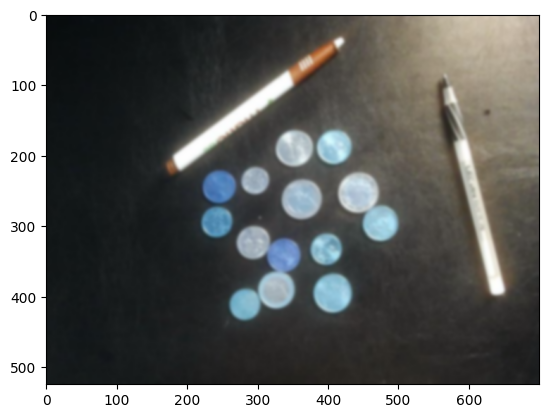

In [109]:
# Reading the Input Image
img = cv.imread('../data/proj2-clean-image.jpg')

# Generates the Gaussian Filter
g_kernel = Gaussian_Filter(2)

# Smoothing the image with the Gaussian Filter
smooth_img = cv.filter2D(img, -1, g_kernel)

# Saves the Smooth Image in the result directory
cv.imwrite("../results/Ques_1/proj2-clean-image-smoothed.png", smooth_img)

# Plots the smoothed image in the notebook
plt.figure(); plt.imshow(smooth_img.astype(np.uint8));

In [110]:
def rgb2gray(rgb):
    '''
    Converts the RGB image to the Gray Scale
    '''

    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

In [111]:
def image_uint(input_arr):
    '''
    Scales the image intensity values to the range [0, 255]
    '''

    return (255.0*(input_arr - np.min(input_arr))/(np.max(input_arr) - np.min(input_arr))).astype(np.uint8)

#### 1.2 Edge Detector
Now we need to extract the edges from the input images. This is as essential step towards detection of lines and circles from the image.

#### You should define a Sobel filter to detect edges in the Original and Smooth Image
Following the definition of the filter, you convolve the filter over the input image using OpenCV library function, <b>filter2D()</b>. You are not required to write any convolution function to apply the filter.

You are required to detect edges on both the <b>original</b> and <b>smooth</b> images.

<b>Do you observe any difference between them? Please comment in a separate cell.</b>

#### 1.2.1 Edge Detector on the Original Image
Please remember the edge detection method should be applied on <b>gray images</b>.
The edge image should be saved as <b>img_gray_edge</b>.

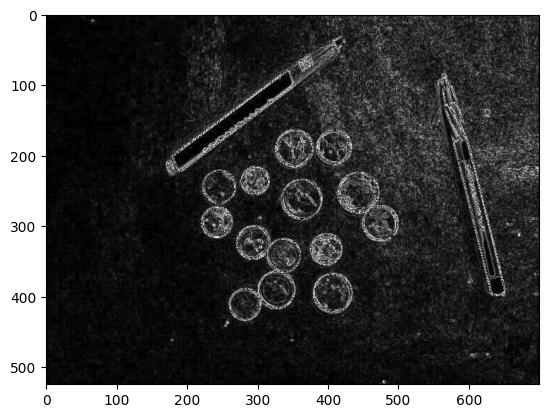

In [143]:
def detect_edges_with_sobel(image):
    '''
    Input:
    image: The input image for edge detection.

    Output:
    img_gray_edge: The resulting image with detected edges.

    Description:
    1. Apply the Sobel filter separately along the x-axis (sobel_x) and y-axis (sobel_y) to compute the gradients.
    2. Calculate the gradient magnitude using the x and y gradients to highlight the edges.
    3. Return the gradient magnitude image
    '''
    img_gray = rgb2gray(image)    
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    img_gray_sobel_x = cv.filter2D(img_gray, -1, sobel_x)
    img_gray_sobel_y = cv.filter2D(img_gray, -1, sobel_y)
    img_gray_edge = np.sqrt(img_gray_sobel_x**2 + img_gray_sobel_y**2)
    return img_gray_edge


img_gray_edge = detect_edges_with_sobel(img)
# Save the Image
cv.imwrite('../results/Ques_1/Ori_Clean_Edge_Image.png', img_gray_edge)

#Plot the Image
plt.figure(); plt.imshow(img_gray_edge.astype(np.uint8), cmap='gray')


#### 1.2.2 Edge Detector on the Smooth Image
Please remember the edge detection method should be applied on <b>gray images</b>.
The edge image should be saved as <b>smooth_img_gray_edge</b>.

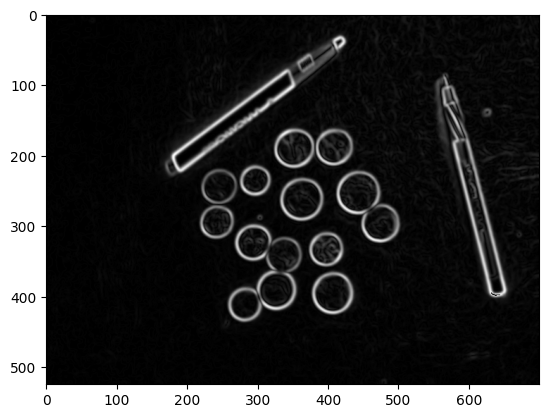

In [113]:
smooth_img_gray_edge = detect_edges_with_sobel(smooth_img)

# Save the Image
cv.imwrite('../results/Ques_1/Smooth_Clean_Edge_Image.png', smooth_img_gray_edge)

#Plot the Image
plt.figure(); plt.imshow(smooth_img_gray_edge.astype(np.uint8), cmap='gray');

#### 1.3 Hough Transform to detect Lines
In this exercise you are expected to implement Hough Transform for line detection as discussed in class. Hough Transform uses an accumulator array to capture the lines present in image. It is applied on binary images which can be generated by thresholding the edge detector output.<br>

For this exercise, the range of theta is <b>[-90, 90]</b> and the range of rho is <b>[-img_diag, img_diag]</b>.<br>

The parameters theta_res and rho_res define the step size within each range. For example:<br>

    If theta_res = 10, the angles considered will be -90°, -80°, -70°, ..., 80°, 90°.
    If rho_res = 5, the distances will be -img_diag, -img_diag + 5, ..., img_diag - 5, img_diag.

In [114]:
import numpy as np

def hough_transform(input_img, threshold, theta_res, rho_res):
    '''
    Computes the accumulator array for the Hough Transform.

    Input:
    1. input_img: The output image from the edge detection method.
    2. threshold: The threshold value for creating a binary image.
    3. theta_res: The resolution for the angle (Theta).
    4. rho_res: The resolution for the perpendicular distance from the origin (Rho).

    Output:
    1. accumulator: The accumulator array.
    2. thetas: The array of theta values (angles in radians).
    3. rhos: The array of rho values (perpendicular distances).
    4. binary_img: The thresholded binary image.
    '''
    
    binary_img = (input_img > threshold).astype(np.uint8)
    img_height, img_width = binary_img.shape
    img_diagonal = int(np.ceil(np.sqrt(img_height**2 + img_width**2)))
    thetas = np.deg2rad(np.arange(-90, 90, theta_res))
    rhos = np.arange(-img_diagonal, img_diagonal + 1, rho_res)
    accumulator = np.zeros((len(rhos), len(thetas)), dtype=np.uint64)
    y_idxs, x_idxs = np.nonzero(binary_img)
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]
        for j in range(len(thetas)):
            rho = x * np.cos(thetas[j]) + y * np.sin(thetas[j])
            rho_idx = int(rho + img_diagonal) 
            if 0 <= rho_idx < len(rhos):
                accumulator[rho_idx, j] += 1  
    return accumulator, thetas, rhos, binary_img

#### 1.3.1 Hough Transform to detect Lines from Original Image

Use the edges detected from the <b>original input image</b> to apply Hough Transform function.<br>
<br>

You need to find a resaonable estimate of the threshold for generating the binary image which is good enough for the Hough transform to extract lines. Please discuss the effect of the threshold on the performance of the algorithm.

Plot the Accumulator Array using the matplotlib function, figure size (20, 20), with proper labeling and title. The image should be saved as <b>Ori_Clean_Image_Accumulator_Array.png</b> in results/Ques_1 sub-directory.

**Note:** If the aspect ratio of the Accumulator Array plot appears skewed, you can adjust it for better visualization by using `interpolation='none'` and `aspect='auto'` with `plt.imshow`. For example: `plt.imshow(image, interpolation='none', aspect='auto')`. This ensures the pixels are displayed without interpolation and the aspect ratio is automatically adjusted to fit the plot area.


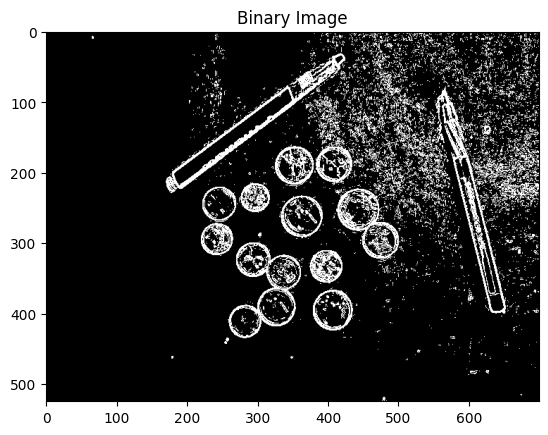

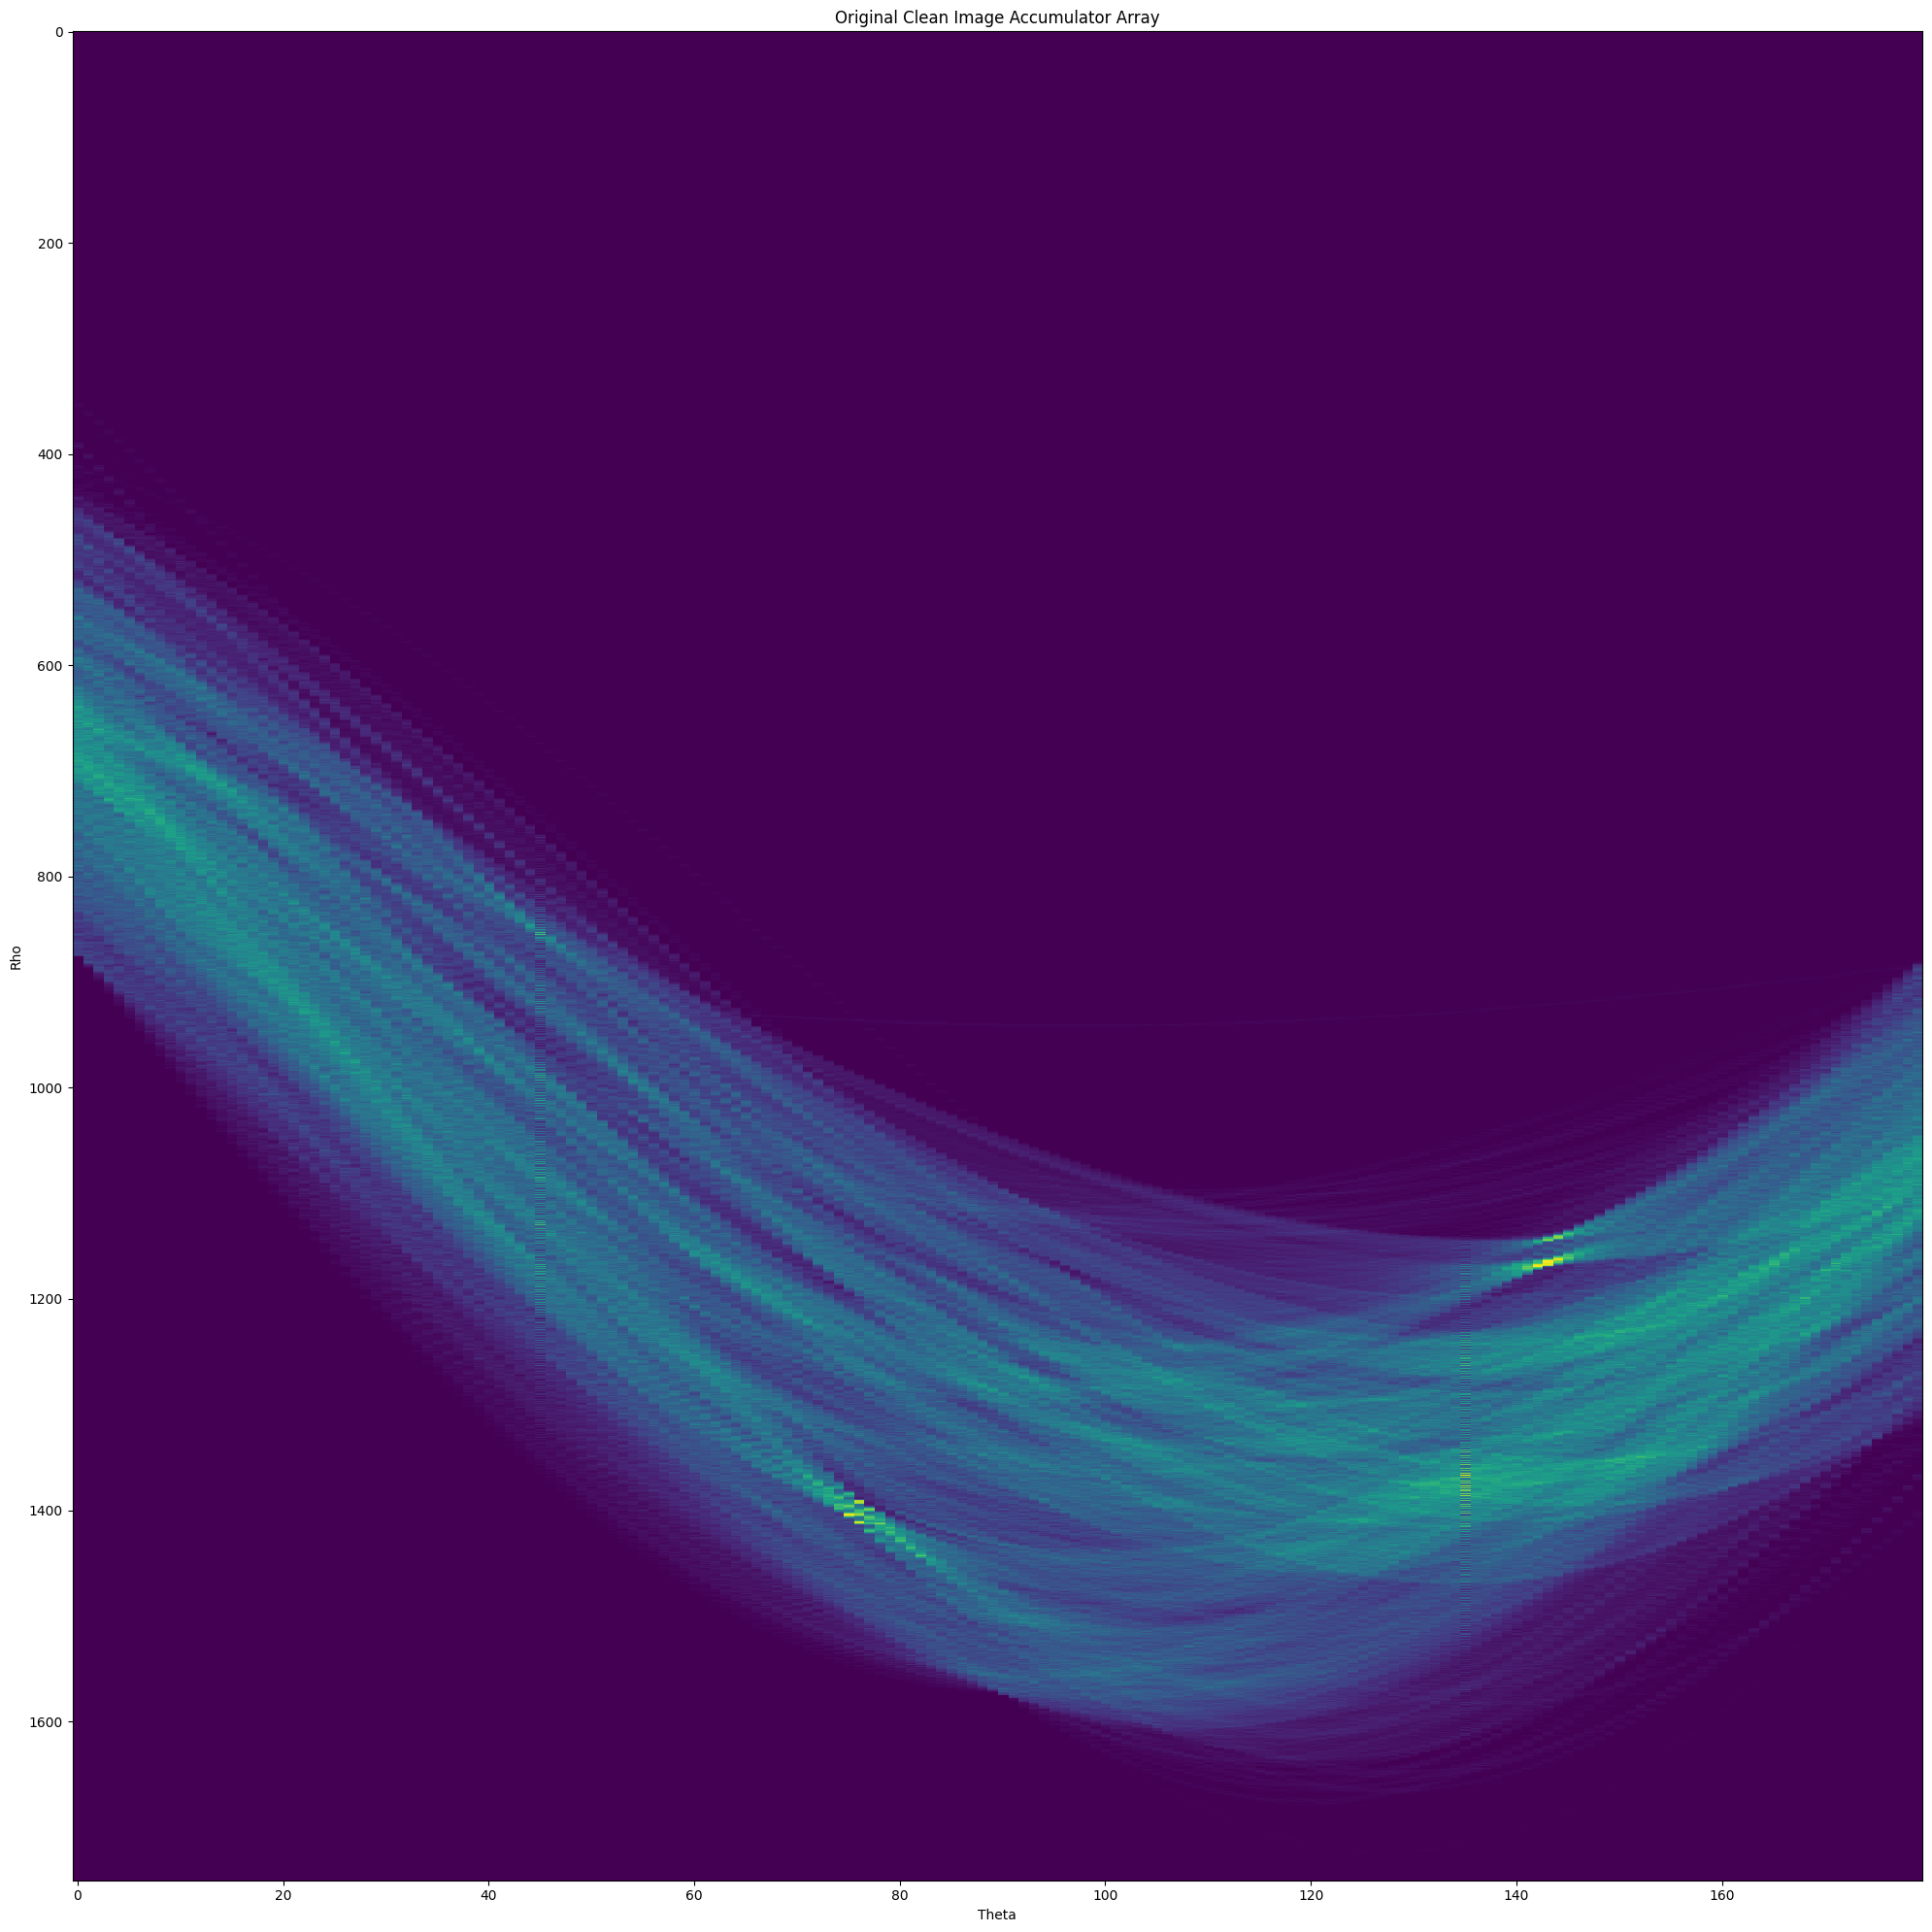

<Figure size 640x480 with 0 Axes>

In [115]:
# Invoke the Hough Transform Method to Extract the Lines from the Image
# You need to find a resaonable estimate of the threshold for generating a binary image
# which is good enough for the Hough transform to extract the lines
# To expedite the process you can play with the resolution of the theta and rho 
# without compromising the quality of the results

ori_accumulator, ori_thetas, ori_rhos, ori_binary_img = hough_transform(img_gray_edge, 70, 1, 1)

# Save the Thresholded Binary Image
cv.imwrite('../results/Ques_1/Ori_Clean_Binary_Image.png', ori_binary_img)

#Plot the Binary Image
plt.figure(); plt.imshow(ori_binary_img.astype(np.uint8), cmap='gray'); plt.title('Binary Image')


fig = plt.figure(figsize=(20, 20))

plt.imshow(ori_accumulator, aspect='auto', interpolation='none')
plt.xlabel('Theta'), plt.ylabel('Rho')
plt.title("Original Clean Image Accumulator Array")
plt.tight_layout()
plt.show()
plt.savefig("../results/Ques_1/Ori_Clean_Image_Accumulator_Array.png")

The threshold has a large impact on the performance of the Hough algorithm, as it determines which edges are considered for line detection. A low threshold may result in many false positives, while a high threshold may miss some of the edges. The threshold should be set such that it is high enough to remove noise but low enough to retain the important edges. The threshold value should be chosen based on the characteristics of the image and the desired output.

For plotting lines (infinite) in the images, you should use the OpenCV <b>line</b> function which can hold all the lines and then you could overlay them on the input image.

**Hint:**
    To draw the infinite lines using OpenCV’s `line` function, you need to provide the start and end points for each line. The intersection points between the lines and the image boundary (edges of the image) can be used as start and end points. A common approach is to compute the x and y coordinates for these intersection points by solving for `x` and `y` in terms of `rho` and `theta` (from the Hough space). Once you have these coordinates, you can pass them to the OpenCV `line` function to overlay the lines on the input image.

In [116]:
import cv2 as cv
import numpy as np

def plot_lines(img_path, accumulator, thetas, rhos, acc_threshold, save_path):
    '''
    This function plots infinite lines on an image using the Hough Transform accumulator array.

    Input:
    1. img_path: Path to the RGB image for plotting lines.
    2. accumulator: Hough Transform accumulator array.
    3. thetas: Vector of angle values (in radians).
    4. rhos: Vector of rho values (distance from origin).
    5. acc_threshold: Threshold value for selecting lines from the accumulator.
    6. save_path: Path to save the image with lines drawn on it.
    
    Output:
    Saves the output image in `save_path`.
    '''

    nh_size = 18  
    img = cv.imread(img_path)
    if img is None:
        print(f"Error: Image at path {img_path} not found.")
        return

    acc_copy = np.copy(accumulator)
    lines = []

    for _ in range(acc_threshold):
        idx = np.argmax(acc_copy)  
        if acc_copy.flat[idx] < acc_threshold:
            break 
        acc_y, acc_x = np.unravel_index(idx, acc_copy.shape)
        lines.append((acc_y, acc_x))
        min_x = max(0, acc_x - nh_size // 2)
        max_x = min(acc_copy.shape[1], acc_x + nh_size // 2 + 1)
        min_y = max(0, acc_y - nh_size // 2)
        max_y = min(acc_copy.shape[0], acc_y + nh_size // 2 + 1)
        acc_copy[min_y:max_y, min_x:max_x] = 0 
    for i in range(len(lines)):
        rho = rhos[lines[i][0]]
        theta = thetas[lines[i][1]]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho

        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    cv.imwrite(save_path, img)

In [117]:
# Plot the Lines extracted on the Original Image
# Play with the Accumulator Thresholding to get rid of the unwanted lines
acc_threshold = 4
plot_lines('../data/proj2-clean-image.jpg', ori_accumulator, ori_thetas, ori_rhos, acc_threshold, save_path='../results/Ques_1/Ori_Clean_Image_Output_Lines.png')

#### 1.3.2 Hough Transform to detect Lines from the Smooth Image

Use the edges detected from the <b>smooth input image</b> to apply Hough Transform function.<br>
<br>

You need to find a resaonable estimate of the threshold for generating the binary image which is good enough for the Hough transform to extract lines. Please discuss the effect of the threshold on the performance of the algorithm.

Plot the Accumulator Array using the matplotlib function, figure size (20, 20), with proper labeling and title. The image should be saved as <b>Smooth_Clean_Image_Accumulator_Array.png</b> in results directory.

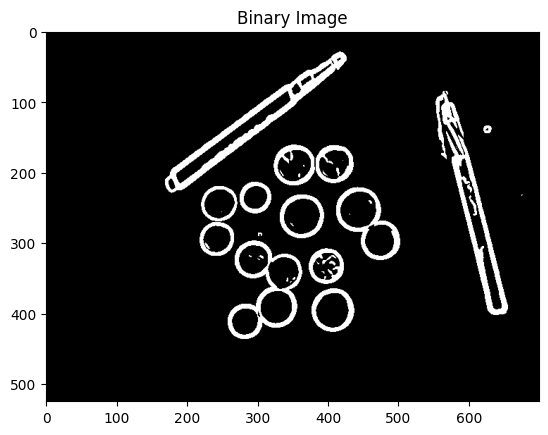

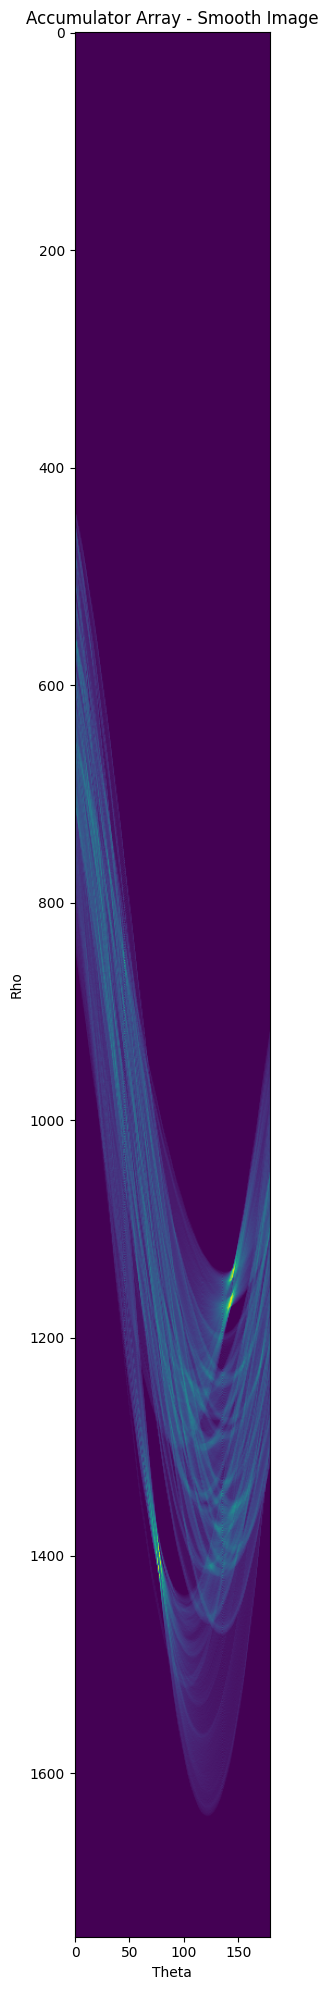

<Figure size 640x480 with 0 Axes>

In [118]:
# Invoke the Hough Transform Method to Extract the Lines from the Image
# You need to find a resaonable estimate of the threshold for generating a binary image
# which is good enough for the Hough transform to extract the lines
# To expedite the process you can play with the resolution of the theta and rho 
# without compromising the quality of the results

threshold = 50
theta_res = 1
rho_res = 1

smooth_accumulator, smooth_thetas, smooth_rhos, smooth_binary_img = hough_transform(smooth_img_gray_edge, threshold, theta_res, rho_res)


# Save the Thresholded Binary Image
cv.imwrite('../results/Ques_1/Smooth_Clean_Binary_Image.png', smooth_binary_img)

#Plot the Binary Image
plt.figure(); plt.imshow(smooth_binary_img.astype(np.uint8), cmap='gray'); plt.title('Binary Image') 

fig = plt.figure(figsize=(20, 20))
plt.imshow(smooth_accumulator)
plt.title("Accumulator Array - Smooth Image")
plt.xlabel('Theta'), plt.ylabel('Rho')
plt.tight_layout()
plt.show()
plt.savefig("../results/Ques_1/Smooth_Clean_Image_Accumulator_Array.png")

In [119]:
# Plot the Lines extracted on the Smooth Image
# Play with the Accumulator Thresholding to get rid of the unwanted lines

plot_lines('../results/Ques_1/proj2-clean-image-smoothed.png', smooth_accumulator, smooth_thetas, smooth_rhos, acc_threshold, save_path='../results/Ques_1/Smooth_Clean_Image_Output_Lines.png')

#### 1.4 Hough Transform to detect Edges

Instead of plotting infinite lines, plot the edges along the boundary of the objects. 

You should use the OpenCV <b>line</b> function to draw the detected edges and overlay them on the input image.

**Hint**: For each detected line, identify which edge pixels fall on that line. Then, connect the extreme points of those pixels to form a finite line segment.

In [120]:
def plot_edges(img_path, accumulator, thetas, rhos, acc_threshold, binary_image, save_path):
    '''
    This function plots edges along the boundary of objects detected by the Hough Transform.
    
    Input:
    1. img_path: Path to the RGB image for plotting edges.
    2. accumulator: Hough Transform accumulator array.
    3. thetas: Vector of angle values (in radians).
    4. rhos: Vector of rho values (distance from origin).
    5. acc_threshold: Threshold value for selecting lines from the accumulator.
    6. binary_image: Binary image used to detect edge points.
    7. save_path: Path to save the image with edges drawn.
    
    Output:
    Saves the output image in `save_path`.
    '''

    # Load the original RGB image
    img = cv.imread(img_path)
    if img is None:
        print(f"Error: Image at path {img_path} not found.")
        return
    acc_copy = np.copy(accumulator)
    lines = []
    for _ in range(acc_threshold):
        idx = np.argmax(acc_copy)
        if acc_copy.flat[idx] < acc_threshold:
            break

        acc_y, acc_x = np.unravel_index(idx, acc_copy.shape)
        lines.append((rhos[acc_y], thetas[acc_x]))

        nh_size = 18 
        min_x = max(0, acc_x - nh_size // 2)
        max_x = min(acc_copy.shape[1], acc_x + nh_size // 2 + 1)
        min_y = max(0, acc_y - nh_size // 2)
        max_y = min(acc_copy.shape[0], acc_y + nh_size // 2 + 1)

        acc_copy[min_y:max_y, min_x:max_x] = 0 

    edges = np.argwhere(binary_image > 0)  

    for rho, theta in lines:
        a = np.cos(theta)
        b = np.sin(theta)

        line_points = []

        for edge_point in edges:
            y, x = edge_point 
            distance = abs(x * a + y * b - rho)
            if distance < 2: 
                line_points.append((x, y))

        if len(line_points) > 1:
            line_points = np.array(line_points)
            x_min, y_min = np.min(line_points, axis=0)
            x_max, y_max = np.max(line_points, axis=0)

            cv.line(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    cv.imwrite(save_path, img)

In [121]:
# Plot the Boundaries of the Pen on the Real Image
# This unlike the previous result is restricted to a finite length line
# Play with the Accumulator Thresholding to get rid of the unwanted lines
plot_edges('../data/proj2-clean-image.jpg', ori_accumulator, ori_thetas, ori_rhos, acc_threshold, ori_binary_img, save_path='../results/Ques_1/Ori_Clean_Image_Output_Edges.png')

In [122]:
# Plot the Boundaries of the Pen on the Smooth Image
# This unlike the previous result is restricted to a finite length line
# Play with the Accumulator Thresholding to get rid of the unwanted lines
plot_edges('../results/Ques_1/proj2-clean-image-smoothed.png', smooth_accumulator, smooth_thetas, smooth_rhos, acc_threshold, smooth_binary_img, save_path='../results/Ques_1/Smooth_Clean_Image_Output_Edges.png')

### 2. Hough Transform to detect Circles (15 points)
In this exercise you are expected to implement Hough Transform for circle detection in images as discussed in class. Hough Transform uses an accumulator array to capture the circles present in image. As a circle could be defined with three parametrs, center (along X and Y axis) and radius, we need a three-dimensional accumulator to store the circle information.

#### Tasks:
1. Hough Transform to detect circles from the Images <b>(10 points)</b>
2. Plot the detected circles on the corresponding images <b>(5 points)</b>

You need to perform the task on the <b>Original Image</b> and <b>Smooth Image</b> computed earlier.

It is applied on <b>binary images</b> which can be generated by thresholding the edge detector output.<br>
You should use the result of the previous edge detection task as input for this exercise.

<b>The center of the circle should be computed using the parametric equations.</b>

In [ ]:
from collections import defaultdict

def circle_hough_transform(input_img, threshold, min_radius, max_radius, radius_res, angle_res):
    '''
    This function computes the accumulator array with the circles
    detected in the image
    
    Input:
    1. Output of the Edge Detection Method
    2. Threshold value for generating the binary image
    3. Min Radius of the Circle to be detected
    4. Max Radius of the Circle to be detected
    5. Resolution for Circle Radius
    6. Angle resolution for parametric equation of circle
    
    Output:
    1. Accumulator array          , declare as accumulator
    2. Array for Circle Center    , declare as center_x_vector, center_y_vector
    3. Array for Radius of Circle , declare as radius_vector
    4. Thresholded Binary Image   , declare as binary_img

    '''
    
    binary_img = (input_img > threshold).astype(np.uint8)
    img_height, img_width = binary_img.shape[:2]
    accumulator = defaultdict(int)
    radius_vector = []
    center_x_vector = []
    center_y_vector = []
    dtheta = int(360 / angle_res)
    thetas = np.arange(0, 360, step=dtheta)
    cos_thetas = np.cos(np.deg2rad(thetas))
    sin_thetas = np.sin(np.deg2rad(thetas))
    circle_candidates = []
    for r in range(min_radius, max_radius, radius_res):
        for t in range(angle_res):
            circle_candidates.append((r, cos_thetas[t], sin_thetas[t]))
    for y in range(img_height):
        for x in range(img_width):
            if binary_img[y, x] > 0:
                for r, cos_t, sin_t in circle_candidates:
                    a = int(x - r * cos_t)
                    b = int(y - r * sin_t)
                    if 0 <= a < img_width and 0 <= b < img_height:
                        accumulator[(a, b, r)] += 1
    output_circles = []
    bin_threshold = 0.8 * max(accumulator.values()) 
    for candidate_circle, votes in sorted(accumulator.items(), key=lambda i: -i[1]):
        if votes >= bin_threshold:
            x, y, r = candidate_circle
            output_circles.append((x, y, r, votes))
    postprocess_circles = []
    pixel_threshold = 5  
    for x, y, r, v in output_circles:
        if all(abs(x - xc) > pixel_threshold or abs(y - yc) > pixel_threshold or abs(r - rc) > pixel_threshold for xc, yc, rc, _ in postprocess_circles):
            postprocess_circles.append((x, y, r, v))
    for x, y, r, v in postprocess_circles:
        center_x_vector.append(x)
        center_y_vector.append(y)
        radius_vector.append(r)

    return accumulator, radius_vector, center_x_vector, center_y_vector, binary_img


#### 2.1.1 Hough Transform to detect Circles from the Original Image

Use the edges detected from the <b>original input image</b> to apply Hough Transform function.<br>

You need to find a resaonable estimate of the threshold for generating the binary image which is good enough for the Hough transform to extract circles. Please discuss the effect of the threshold on the performance of the algorithm.

##### Please note that you should be able to extract atleast 7 coins. This ensures 75% of the credit.

In [132]:
# Invoke the Hough Transform Method to Extract the Circles from the Image
# To expedite the process you can play with the resolution parameters 
# without compromising the quality of the results

threshold = 110
angle_res = 360
min_radius = 15
max_radius = 70
radius_res = 1


ori_circle_accumulator, ori_circle_radius_vector, ori_circle_center_x_vector, ori_circle_center_y_vector, ori_circle_img_bin = circle_hough_transform(img_gray_edge, threshold, min_radius, max_radius, radius_res, angle_res)

cv.imwrite('../results/Ques_2/Ori_Clean_Binary_Image_Circle_Detection.png', ori_circle_img_bin)


Circle Candidates:  19800
Number of detected circles: 1000
len(center_x_vector):  23


True

The threshold has a large impact on the performance of the Hough algorithm, as it determines which edges are considered for circle detection. A low threshold may result in many false positives, while a high threshold may miss some of the edges. The threshold should be set such that it is high enough to remove noise but low enough to retain the important edges. The threshold value should be chosen based on the characteristics of the image and the desired output.

#### 2.1.2 Hough Transform to detect Circles from the Smooth Image

Use the edges detected from the <b>smooth input image</b> to apply Hough Transform function or generate a suitable smooth image (following the same procedure) for this exercise to detect coins. If you generate a new smooth image please save the generated image as <b>proj2-clean-image-smoothed-circle-detection.png</b>.<br>

You should explain the reason for generating a new smooth image, report the value of sigma and discuss its effect on the performance of the circle detection algorithm.<br>
<br>
You need to find a resaonable estimate of the threshold for generating the binary image
which is good enough for the Hough transform to extract circles. Please discuss the effect of the threshold on the performance of the algorithm.<br>

##### Please note that you should be able to extract atleast 7 coins. This ensures 75% of the credit.

In [133]:
# Invoke the Hough Transform Method to Extract the Circles from the Image
# You need to find a resaonable estimate of the threshold for generating a binary image
# which is good enough for the Hough transform to extract circles
# To expedite the process you can play with the resolution parameters 
# without compromising the quality of the results

threshold = 110
angle_res = 360
min_radius = 15
max_radius = 70
radius_res = 1

smooth_circle_accumulator, smooth_circle_radius_vector, smooth_circle_center_x_vector, smooth_circle_center_y_vector, smooth_circle_img_bin = circle_hough_transform(smooth_img_gray_edge, threshold, min_radius, max_radius, radius_res, angle_res)

# Save the Thresholded Binary Image
cv.imwrite('../results/Ques_2/Smooth_Clean_Binary_Image_Circle_Detection.png', smooth_circle_img_bin)

Circle Candidates:  19800
Number of detected circles: 801
len(center_x_vector):  14


True

The threshold has a large impact on the performance of the Hough algorithm, as it determines which edges are considered for circle detection. A low threshold may result in many false positives, while a high threshold may miss some of the edges. The threshold should be set such that it is high enough to remove noise but low enough to retain the important edges. The threshold value should be chosen based on the characteristics of the image and the desired output.

#### 2.2 Plot the Circles around the coins in the image
You should use the OpenCV <b>circle</b> function for drawing circles. This can hold all the circles and then you could overlay them on the input image.

In [137]:
def plot_circles(img_path, accumulator, radius_vector, center_x_vector, center_y_vector, acc_threshold, bin_image, img_save_path):

    '''
    This function plots cirles
    This should be used to draw lines along the boundary of the pens
    
    Input:
    1. RGB Image for plotting circles
    2. Accumulator array
    3. Vector of the radius values
    4. Vector of the center of the circle
    5. Threshold value for selecting lines from the accumulator
    6. Path to save the image with lines drawn on them
    
    Output:
    Returns Nothing
    Saves the output image in save_path
    '''
    
    cv_img = cv.imread(img_path)
    if cv_img is None:
        print(f"Error: Image at path {img_path} not found.")
        
    for i in range(len(center_x_vector)):
        if accumulator[center_x_vector[i], center_y_vector[i], radius_vector[i]] > acc_threshold:
            cv.circle(cv_img, (center_x_vector[i], center_y_vector[i]), radius_vector[i], (0, 255, 0), 2)
            
    # All the changes made in the input image are finally
    # written on a new file
    cv.imwrite(img_save_path, cv_img)


#### 2.2.1 Plot the Circles around the coins in the Original Image

Play with the Accumulator Thresholding to get rid of unwanted circles.


In [138]:
# Plot the Circles extracted on the Original Image

plot_circles('../data/proj2-clean-image.jpg', ori_circle_accumulator, ori_circle_radius_vector, ori_circle_center_x_vector, ori_circle_center_y_vector, acc_threshold, ori_circle_img_bin, '../results/Ques_2/Ori_Clean_Image_Output_Circles.png')

 #### 2.2.2 Plot the Circles around the coins in the Smooth Image

Play with the Accumulator Thresholding to get rid of unwanted circles.


In [139]:
# Plot the Circles extracted on the Smooth Image

plot_circles('../results/Ques_1/proj2-clean-image-smoothed.png', smooth_circle_accumulator, smooth_circle_radius_vector, smooth_circle_center_x_vector, smooth_circle_center_y_vector, acc_threshold, smooth_circle_img_bin, '../results/Ques_2/Smooth_Clean_Image_Output_Circles.png')

### 3 Hough Transform to detect Lines from Cluttered Image (15 points)
In this exercise you are expected to implement Hough Transform for line detection from cluttered image. Hough Transform uses an accumulator array to capture the lines present in image. It is applied on binary images which can be generated by thresholding the edge detector output.

#### Tasks:
1. Smooth the given image using the Gaussian Filter. Determine the Gaussian filter and comment on its effect in determining the lines. Save the smooth image as <b>clutter_smooth_img</b>, numpy array. <b>(2 points)</b>
2. Identify the edges in the smooth image, generated in the previous step. You can use the solution of <b>Ques 1.2</b>. Save the numpy array as <b>clutter_smooth_img_gray_edge</b>. <b>(2 points)</b>
3. Identify the lines in the Image using Hough Transform. <b>(2 points)</b>
4. Draw the detected lines. <b>(2 points)</b>
5. Likely the last produced several lines which DO NOT repesent the boundary of the pens. How do you take care of the probem? <b>(2 points)</b>
6. Find the lines which represents only the boundary of the pens. <b>(5 points)</b>

#### 3.1 Smooth the given image using the Gaussian Filter. Determine the Gaussian filter and comment on its effect in determining the lines. Save the smooth image as clutter_smooth_img, numpy array.

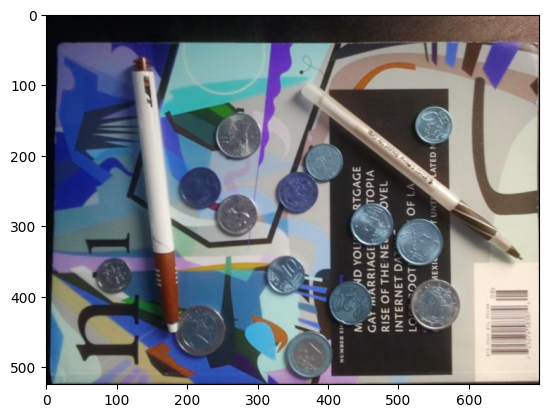

In [211]:
# Reading the Input Image
clutter_img  = cv.imread('../data/proj2-clutter-image.jpg')

kernel = Gaussian_Filter(0.5)
clutter_smooth_img = cv.filter2D(clutter_img, -1, kernel)

# Saves the Smooth Image in the result directory
cv.imwrite("../results/Ques_3/clutter_smooth_img.png", clutter_smooth_img)

# Plots the smoothed image in the notebook
plt.figure(); plt.imshow(clutter_smooth_img.astype(np.uint8));

Answer: The effect of the Gaussian filter in determining the lines is to reduce the noise in the image, which can help improve the accuracy of edge detection and line detection algorithms. By smoothing the image, the Gaussian filter can help to remove small details and irregularities that are not relevant to the lines in the image, making it easier to detect the lines accurately.

#### 3.2 Identify the edges in the smooth image, generated in the previous step. You can use the solution of Ques 1.2. Save the numpy array as clutter_smooth_img_gray_edge.

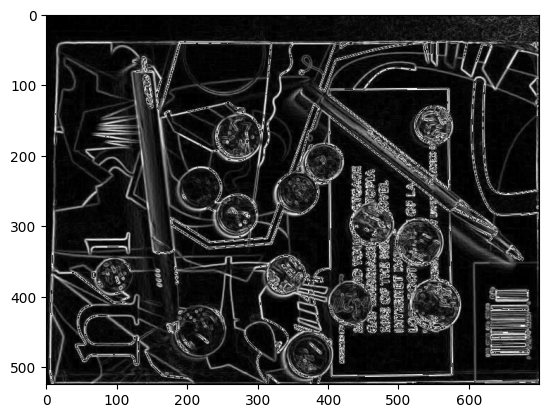

In [212]:
# Convert the Smooth Image to Gray Scale
clutter_smooth_img_gray = rgb2gray(clutter_smooth_img)

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
img_gray_sobel_x = cv.filter2D(clutter_smooth_img_gray, -1, sobel_x)
img_gray_sobel_y = cv.filter2D(clutter_smooth_img_gray, -1, sobel_y)
img_gray_edge = np.sqrt(img_gray_sobel_x**2 + img_gray_sobel_y**2)

clutter_smooth_img_gray_edge = np.sqrt(img_gray_sobel_x**2 + img_gray_sobel_y**2)

# Save the Image
cv.imwrite('../results/Ques_3/clutter_smooth_img_gray_edge.png', clutter_smooth_img_gray_edge)

#Plot the Image
plt.figure(); plt.imshow(clutter_smooth_img_gray_edge.astype(np.uint8), cmap='gray');

#### 3.3 Identify the lines in the Image using Hough Transform

Text(0.5, 1.0, 'Binary Image')

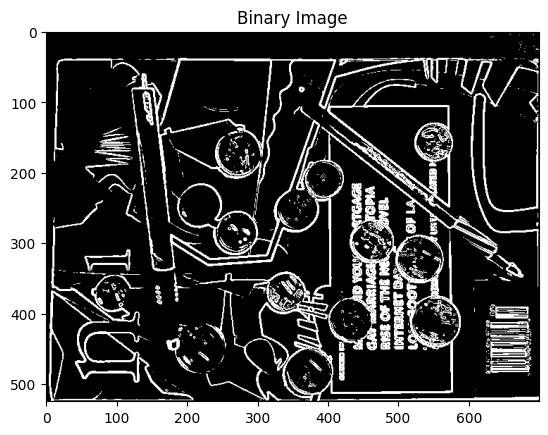

In [213]:
# Invoke the Hough Transform Method to Extract the Lines from the Image
# You need to find a resaonable estimate of the threshold for generating a binary image
# which is good enough for the Hough transform to extract the lines
# To expedite the process you can play with the resolution of the theta and rho 
# without compromising the quality of the results
threshold=100
theta_res=1 
rho_res=1
clutter_smooth_accumulator, clutter_smooth_thetas, clutter_smooth_rhos, clutter_smooth_binary_img = hough_transform(clutter_smooth_img_gray_edge, threshold, theta_res, rho_res)

# Save the Thresholded Binary Image
cv.imwrite('../results/Ques_3/Clutter_Smooth_Binary_Image.png', clutter_smooth_binary_img)

#Plot the Binary Image
plt.figure(); plt.imshow(clutter_smooth_binary_img.astype(np.uint8), cmap='gray'); plt.title('Binary Image')

#### 3.4 Draw the detected lines

In [216]:
# Plot the Lines extracted on the Original Image
# Play with the Accumulator Thresholding to get rid of the unwanted lines
acc_threshold=9
plot_lines('../results/Ques_3/clutter_smooth_img_gray_edge.png', clutter_smooth_accumulator, clutter_smooth_thetas, clutter_smooth_rhos, acc_threshold, save_path='../results/Ques_3/Clutter_Smooth_Image_Output_Lines.png')

#### 3.5 Most likely the last exercise produced several lines which DO NOT repesent the boundaries of the pens. How do you take care of the probem? Discuss.

Indeed, there are 5 lines which do not represent the boundaries of the pens. To take care of this problem, we can apply post-processing techniques to filter out the unwanted lines. One approach is to set a threshold on the number of votes in the accumulator array, such that only the lines with a sufficient number of votes are considered as valid lines. This helps to remove the false positives and retain the lines that are more likely to represent the pens boundaries.  We can also specify a threshold on the length of the lines, such that only the lines with a certain length are considered as valid lines. This can help to filter out the short lines that are likely to be noise or artifacts in the image. 

#### 3.6 Find the edges which represents only the boundaries of the pens and plot it on the smooth version of the clutter image. 
You need to write a function similar to plot_edges() (but NOT the same).  You will need to check the length of each segment of the line and select only the ones that are above a certain threshold length.  

Save the output image as <b>'../results/Ques_3/Clutter_Smooth_Image_Output_Edges.png'</b>

In [229]:
def plot_filtered_edges(img_path, accumulator, thetas, rhos, acc_threshold, binary_image, min_length, min_segment_dist, save_path):
    
    img = cv.imread(img_path)
    if img is None:
        print(f"Error: Image at path {img_path} not found.")
        return

    acc_copy = np.copy(accumulator)

    lines = []

    for _ in range(acc_threshold):
        idx = np.argmax(acc_copy)
        if acc_copy.flat[idx] < acc_threshold:
            break 

        acc_y, acc_x = np.unravel_index(idx, acc_copy.shape)
        lines.append((rhos[acc_y], thetas[acc_x]))

        nh_size = 18  
        min_x = max(0, acc_x - nh_size // 2)
        max_x = min(acc_copy.shape[1], acc_x + nh_size // 2 + 1)
        min_y = max(0, acc_y - nh_size // 2)
        max_y = min(acc_copy.shape[0], acc_y + nh_size // 2 + 1)

        acc_copy[min_y:max_y, min_x:max_x] = 0 

    edges = np.argwhere(binary_image > 0) 

    for rho, theta in lines:
        a = np.cos(theta)
        b = np.sin(theta)

        line_points = []
        for edge_point in edges:
            y, x = edge_point  

            distance = abs(x * a + y * b - rho)
            if distance < 2:  
                line_points.append((x, y))

        if len(line_points) > 1:
            line_points = sorted(line_points, key=lambda pt: (pt[0], pt[1]))
            start_point = line_points[0]
            segment_points = [start_point]
            for point in line_points[1:]:
                dist = np.linalg.norm(np.array(point) - np.array(start_point))
                if dist >= min_segment_dist:  
                    segment_points.append(point)
                    start_point = point

            if len(segment_points) > 1:
                x_min, y_min = segment_points[0]
                x_max, y_max = segment_points[-1]

                segment_length = np.linalg.norm(np.array([x_max, y_max]) - np.array([x_min, y_min]))
                if segment_length >= min_length:  
                    if x_min > 5 and x_max < img.shape[1] - 5 and y_min > 5 and y_max < img.shape[0] - 5:
                        if abs(x_max - x_min) > 10 and abs(y_max - y_min) > 10:
                            cv.line(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    cv.imwrite(save_path, img)

acc_threshold = 9
distance_threshold = 300
plot_filtered_edges('../results/Ques_3/clutter_smooth_img_gray_edge.png', clutter_smooth_accumulator, clutter_smooth_thetas, clutter_smooth_rhos, acc_threshold,
                    clutter_smooth_binary_img, 200, distance_threshold, save_path='../results/Ques_3/Clutter_Smooth_Image_Output_Edges.png')

### 4. Hough Transform to detect Circles from Cluttered Image (20 points)
In this exercise you are expected to implement Hough Transform for detecting circles from cluttered image. Hough Transform is applied on binary images which can be generated by thresholding the edge detector output.

#### Tasks:
1. Smooth the given image using the Gaussian Filter. Determine the Gaussian filter and comment on its effect in determining the circles. Save the smooth image as <b>clutter_smooth_img_circle_detection</b>, numpy array. <b>(2 points)</b>
2. Identify the edges in the smooth image, generated in the previous step. You can use the solution of <b>Ques 1.2</b>. Save the numpy array as <b>clutter_smooth_img_gray_edge_circle_detection</b>. <b>(3 points)</b>
3. Identify the circles in the Image using Hough Transform. <b>(3 points)</b>
4. Draw the detected circles. <b>(2 points)</b>
5. Did the last solution detect any unwanted circles? If yes, please explain the reason. Which parameters you feel are affecting the result. Moreover, what could be the correct measures to prevent this? <b>(5 points)</b>
6. You are required to find boundaries around at least 8 coins in the image. <b>(5 points)</b>

#### 4.1 Smooth the given image using the Gaussian Filter. Determine the Gaussian filter and comment on its effect in determining the circles. Save the smooth image as <b>clutter_smooth_img_circle_detection</b>, numpy array.

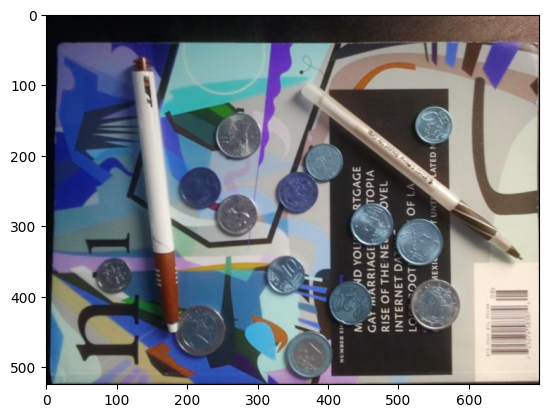

In [247]:
# Reading the Input Image
clutter_img_circle_detection = cv.imread('../data/proj2-clutter-image.jpg')

kernel = Gaussian_Filter(0.5)
clutter_smooth_img_circle_detection = cv.filter2D(clutter_img_circle_detection, -1, kernel)

# Saves the Smooth Image in the result directory
cv.imwrite("../results/Ques_4/proj2-clutter-image-smoothed_circle_detection.png", clutter_smooth_img_circle_detection)

# Plots the smoothed image in the notebook
plt.figure(); plt.imshow(clutter_smooth_img_circle_detection.astype(np.uint8));

Answer: The effect of the Gaussian filter is to reduce the noise in the image, which can help improve the accuracy of edge detection and circle detection algorithms. However, if sigma is too high, it may cause blurring of the edges, which can make it difficult to detect the circles. If sigma is too low, it may not remove enough noise, which can lead to false positives in the circle detection.

#### 4.2 Identify the circles in the smooth image, generated in the previous step. You can use the solution of <b>Ques 1.2</b>. 
Save the numpy array as <b>clutter_smooth_img_gray_edge_circle_detection</b>.

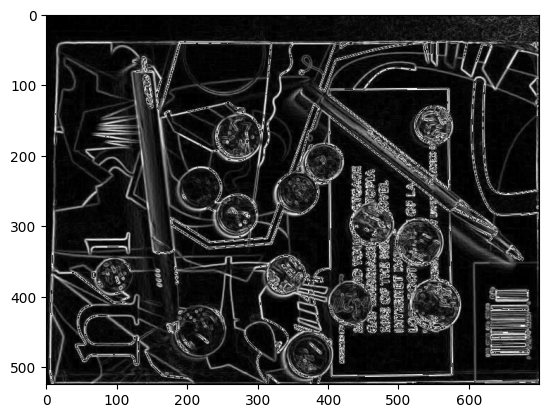

In [248]:
clutter_smooth_img_gray = rgb2gray(clutter_smooth_img_circle_detection)

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
img_gray_sobel_x = cv.filter2D(clutter_smooth_img_gray, -1, sobel_x)
img_gray_sobel_y = cv.filter2D(clutter_smooth_img_gray, -1, sobel_y)

clutter_smooth_img_gray_edge_circle_detection = np.sqrt(img_gray_sobel_x**2 + img_gray_sobel_y**2)

# Save the Image
cv.imwrite('../results/Ques_4/Smooth_Clutter_Edge_Image_Circle_Detection.png', clutter_smooth_img_gray_edge_circle_detection)

#Plot the Image
plt.figure(); plt.imshow(clutter_smooth_img_gray_edge.astype(np.uint8), cmap='gray');

#### 4.3 Identify the circles in the Image using Hough Transform

In [258]:
# Invoke the Hough Transform Method to Extract the Circles from the Image
# You need to find a resaonable estimate of the threshold for generating a binary image
# which is good enough for the Hough transform to extract circles
# To expedite the process you can play with the resolution parameters 
# without compromising the quality of the results

threshold=120
angle_res=10
min_radius=20
max_radius=45
radius_res=1

clutter_smooth_circle_accumulator, clutter_smooth_circle_radius_vector, clutter_smooth_circle_center_x_vector, clutter_smooth_circle_center_y_vector, clutter_smooth_circle_img_bin = circle_hough_transform(clutter_smooth_img_gray_edge_circle_detection, threshold, min_radius, max_radius, radius_res, angle_res)

# Save the Thresholded Binary Image
cv.imwrite('../results/Ques_4/Smooth_Clutter_Binary_Image_Circle_Detection.png', clutter_smooth_circle_img_bin)

Circle Candidates:  250
Number of detected circles: 63271
len(center_x_vector):  1860


True

#### 4.4 Draw the detected circles

In [259]:
# Plot the Circles extracted on the Smooth Image

plot_circles('../results/Ques_4/proj2-clutter-image-smoothed_circle_detection.png', clutter_smooth_circle_accumulator, clutter_smooth_circle_radius_vector, clutter_smooth_circle_center_x_vector, clutter_smooth_circle_center_y_vector, acc_threshold, clutter_smooth_circle_img_bin, '../results/Ques_4/Smooth_Clutter_Image_Output_Circles.png')

#### 4.5 Did the last solution detect any unwanted circles? If yes, please explain the reason. Which parameters you feel are affecting the result. Moreover, what could be the correct measures to prevent this?

Yes it did detect some unwanted circles. The unwanted circles are detected due to noise in the image, which can lead to false positives in the circle detection. The parameters that can affect the result are the threshold value for generating the binary image, the minimum and maximum radius of the circles, the resolution of the radius and angle, and the resolution of the accumulator array. 

 A non-max suppression could be applied to remove some unwanted circles. This can be done by checking the distance between the centers of the detected circles and removing the circles that are too close to each other + keeping the most prominent one. 
 

We could also use a IoU (Intersection over Union) metric to remove the circles that overlap with each other. This can help to remove the redundant circles and retain only the circles that are distinct.

#### 4.6 Devise some mechanisms such that you can find boundaries of at least 8 coins in the image

In [262]:
threshold=100
angle_res=10
min_radius=20
max_radius=45
radius_res=1
clutter_smooth_circle_accumulator, clutter_smooth_circle_radius_vector, clutter_smooth_circle_center_x_vector, clutter_smooth_circle_center_y_vector, clutter_smooth_circle_img_bin = circle_hough_transform(clutter_smooth_img_gray_edge_circle_detection, threshold, min_radius, max_radius, radius_res, angle_res)

Circle Candidates:  250
Number of detected circles: 102833
len(center_x_vector):  2585


In [263]:
# potential post-processing over the circles

In [264]:
acc_threshold = 9
plot_circles('../results/Ques_4/proj2-clutter-image-smoothed_circle_detection.png', clutter_smooth_circle_accumulator, clutter_smooth_circle_radius_vector, clutter_smooth_circle_center_x_vector, clutter_smooth_circle_center_y_vector, acc_threshold, clutter_smooth_circle_img_bin, '../results/Ques_4/Smooth_Clutter_Image_Output_Circles_2.png')

### 5 Test Robustness to Noise (20 points)
In this exercise, we test the robustness of Hough Transform to Gaussian noise.<br>
For this experiment, consider the optimum setting of the parameters (like sigma for smoothing, threshold for binary image, threshold for accumulator and others) for both line and circle detection using Hough Transform.<br>

Then keep adding Gaussian noise to the clutter image, <b>proj2-clutter-image.jpg</b>, starting with sigma value of 5.0 and doubling the sigma at every step, until the detection of lines and circles substantially fails. Mark this value as the of sigma as the failure sigma value.<br>

Between the starting sigma value i.e., 5.0 and the failure sigma value, show sequence of 5 images (equally spaced as per the number of steps) with the detected lines and circles drawn on them where each image represents different sigma value for the Gaussian noise.<br>

With failure sigma value as noise parameter, generate the noisy image and determine a smoothing filter (Gaussian filter as used earlier) to detect lines and circles from the noisy image. Do not change any other parameters used for extraction of lines and circles.

#### Task
1. Starting with sigma value of 5.0 and doubling the sigma at every step determine the sigma when the line and circle detection using Hough Transform fails. <b>(10 points)</b>
2. Plot sequence of 5 images (equally spaced as per the number of steps) with the detected lines or circles drawn on them where each image represents different sigma value for the Gaussian noise. Save the output images separately for circles and lines with the corresponding sigma values. <b>(5 points)</b>
3. Generate a smoothing filter that can handle the maximum noise and help in the detection of lines and circles from the noisy image. Keep the other parameters similar. Save the output images for circles and lines separately. <b>(5 points)</b>

#### Results:
All the output images should be saved in the directory <b>results/Ques_5/</b> with a meaningful name (as used in previous questions). Use the <b>imwrite</b> function in OpenCV library for saving images. You should use the OpenCV <b>line</b> and <b>circle</b> function to draw lines and circles respectively.  Make sure to save the noisy and filtered images you are generating.  

In [310]:
clutter_img = cv.imread("../data/proj2-clutter-image.jpg")
clutter_img_gray = rgb2gray(clutter_img)
plt.imshow(clutter_img_gray, cmap='gray')

def add_gaussian_noise(image, sigma):
    noise = np.random.normal(0, sigma, image.shape)
    noisy_image = image + noise
    return noisy_image

def sobel(image):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    img_gray_sobel_x = cv.filter2D(image, -1, sobel_x)
    img_gray_sobel_y = cv.filter2D(image, -1, sobel_y)
    img_gray_edge = (np.sqrt(img_gray_sobel_x**2 + img_gray_sobel_y**2)).astype(np.uint8)
    return img_gray_edge

sigmas = [5.0, 10.0, 20.0, 40.0, 80.0, 160.0]

for sigma in sigmas:
    print("sigma", sigma)
    clutter_img_copy = clutter_img_gray.copy()
    clutter_img_noisy = add_gaussian_noise(clutter_img_copy, sigma)
    # plt.figure(); plt.imshow(clutter_img_noisy, cmap='gray'); plt.title(f"Noisy Image with Sigma={sigma}")
    cv.imwrite(f"../results/Ques_5/Noisy_Image_Sigma_{sigma}.png", clutter_img_noisy)
    kernel = Gaussian_Filter(1)
    clutter_img_smooth = cv.filter2D(clutter_img_noisy, -1, kernel)
    cv.imwrite(f"../results/Ques_5/Noisy_Image_Smooth_Sigma_{sigma}.png", clutter_img_smooth)
    clutter_img_noisy_edge = sobel(clutter_img_noisy)
    # save clutter image with noise and edge
    cv.imwrite(f"../results/Ques_5/Edges_Noisy_Image_Sigma_{sigma}.png", clutter_img_noisy_edge)

    # apply hough transform on the noisy image
    threshold=100
    theta_res=1 
    rho_res=1
    clutter_smooth_accumulator, clutter_smooth_thetas, clutter_smooth_rhos, clutter_smooth_binary_img = hough_transform(clutter_img_noisy_edge, threshold, theta_res, rho_res)

    acc_threshold = 14
    # plot the lines on the noisy image
    plot_lines(f"../results/Ques_5/Noisy_Image_Sigma_{sigma}.png", clutter_smooth_accumulator, clutter_smooth_thetas, clutter_smooth_rhos, acc_threshold, f"../results/Ques_5/Noisy_Image_Lines_Sigma_{sigma}.png")

    # apply circle hough transform on the noisy image
    threshold=100
    angle_res=10
    min_radius=20
    max_radius=45
    radius_res=1

    clutter_smooth_circle_accumulator, clutter_smooth_circle_radius_vector, clutter_smooth_circle_center_x_vector, clutter_smooth_circle_center_y_vector, clutter_smooth_circle_img_bin = circle_hough_transform(clutter_img_noisy_edge, threshold, min_radius, max_radius, radius_res, angle_res)

    # plot the circles on the noisy image
    acc_threshold = 9
    plot_circles(f"../results/Ques_5/Noisy_Image_Sigma_{sigma}.png", clutter_smooth_circle_accumulator, clutter_smooth_circle_radius_vector, clutter_smooth_circle_center_x_vector, clutter_smooth_circle_center_y_vector, acc_threshold, clutter_smooth_circle_img_bin, f"../results/Ques_5/Noisy_Image_Circles_Sigma_{sigma}.png")

Answer: It stopped working at sigma = 20 with the parameters I used. 

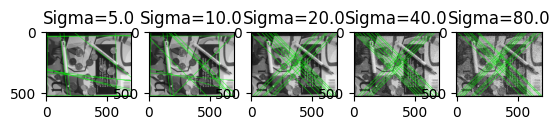

In [317]:
plt.figure();
sigmas = [5.0, 10.0, 20.0, 40.0, 80.0, 160.0]
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv.imread(f"../results/Ques_5/Noisy_Image_Lines_Sigma_{sigmas[i]}.png"), cmap='gray')
    plt.title(f"Sigma={sigmas[i]}")
    
plt.savefig("../results/Ques_5/Subplot_Noise_Clutter_Image_Output_Lines.png")

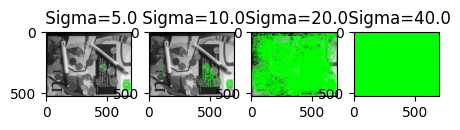

In [319]:
plt.figure();
for i in range(4):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv.imread(f"../results/Ques_5/Noisy_Image_Circles_Sigma_{sigmas[i]}.png"), cmap='gray')
    plt.title(f" Sigma={sigmas[i]}")
plt.savefig("../results/Ques_5/Subplot_Noise_Clutter_Image_Output_Circles.png")

True

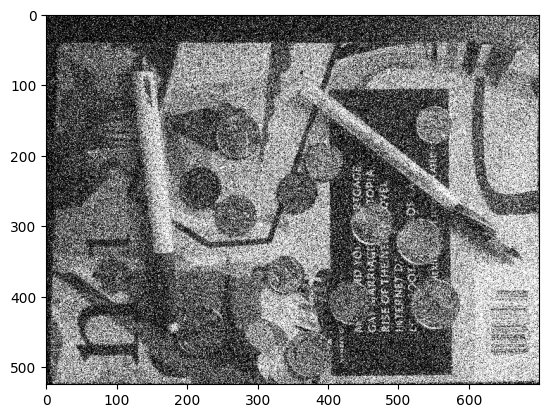

In [321]:
noise_img_80 = cv.imread('../results/Ques_5/Noisy_Image_Sigma_80.0.png')
plt.figure(); plt.imshow(noise_img_80.astype(np.uint8), cmap='gray');
cv.imwrite('../results/Ques_5/Noise_Image_80.png', noise_img_80)


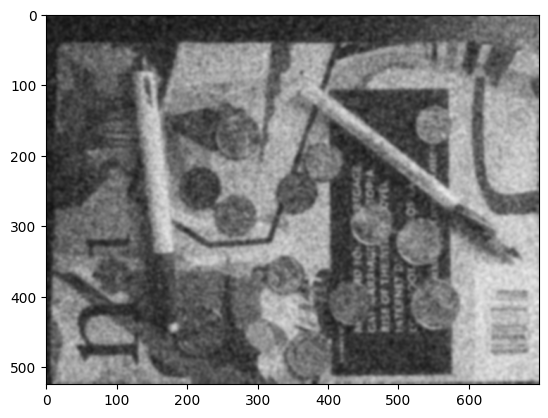

In [362]:
kernel = Gaussian_Filter(2)
noise_clutter_img_smooth = cv.filter2D(noise_img_80, -1, kernel)
cv.imwrite('../results/Ques_5/Noise_Image_Smooth_80_removed.png', noise_clutter_img_smooth)
plt.figure(); plt.imshow(noise_clutter_img_smooth.astype(np.uint8), cmap='gray');

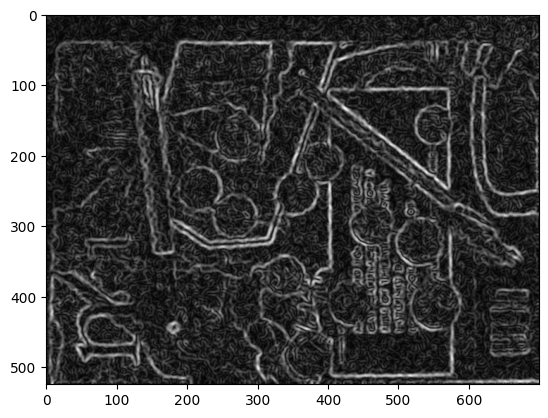

In [363]:
noise_clutter_img_80_grey = rgb2gray(noise_clutter_img_smooth)
noise_clutter_img_80_edge = sobel(noise_clutter_img_80_grey)
cv.imwrite('../results/Ques_5/Noise_Image_Edge_80.png', noise_clutter_img_80_edge)
plt.figure(); plt.imshow(noise_clutter_img_80_edge, cmap='gray');

In [364]:
# hough transforms
threshold=100
theta_res=1
rho_res=1

noise_clutter_accumulator, noise_clutter_thetas, noise_clutter_rhos, noise_clutter_binary_img = hough_transform(noise_clutter_img_80_edge, threshold, theta_res, rho_res)
cv.imwrite('../results/Ques_5/Noise_Image_Binary_80.png', noise_clutter_binary_img)

True

In [366]:
acc_threshold = 10
plot_lines('../results/Ques_5/Noise_Image_80.png', noise_clutter_accumulator, noise_clutter_thetas, noise_clutter_rhos, acc_threshold, '../results/Ques_5/Noise_Image_Lines_80.png')

In [367]:
 # circle hough transform
threshold= 100
angle_res=1
min_radius=20
max_radius=60
radius_res=1
noise_clutter_circle_accumulator, noise_clutter_circle_radius_vector, noise_clutter_circle_center_x_vector, noise_clutter_circle_center_y_vector, noise_clutter_circle_img_bin = circle_hough_transform(noise_clutter_img_80_edge, threshold, min_radius, max_radius, radius_res, angle_res)

Circle Candidates:  40
Number of detected circles: 1053710
len(center_x_vector):  10803


In [368]:
acc_threshold = 10
plot_circles('../results/Ques_5/Noise_Image_80.png', noise_clutter_circle_accumulator, noise_clutter_circle_radius_vector, noise_clutter_circle_center_x_vector, noise_clutter_circle_center_y_vector, acc_threshold, noise_clutter_circle_img_bin, '../results/Ques_5/Noise_Image_Circles_80.png')

### 6 Hough Transform to detect Lines and Circles from a Distorted Image (10 points)
In this exercise you should use your Hough Transform implementation to try and detect lines and circles from the distorted image, <b>proj2-foreshortened-image.jpg</b>. Load the image from the data directory to do all the procesing to extract the lines and circles.


#### Tasks:
1. Plot the edges of the pens and boundaries of the coins, using the functions defined in the previous questions <b>(3 points)</b>
3. How many of the lines and edges in the image did your Hough transform detect? How many additional lines and circles do you see that weren't detected? What differences in appearance, shape, etc. do you notice between those that were and weren't detected? <b>(3 points)</b>
4. Discuss what changes to the alogirhtm you think could help in making the missed lines and circles visible? <b>(4 points)</b>

#### Results:
All the output images should be saved in the directory <b>results/Ques_6/</b> with a meaningful name (as used in previous questions). Use the <b>imwrite</b> function in OpenCV library for saving images. You should use the OpenCV <b>line</b> and <b>circle</b> function to draw lines and circles respectively.

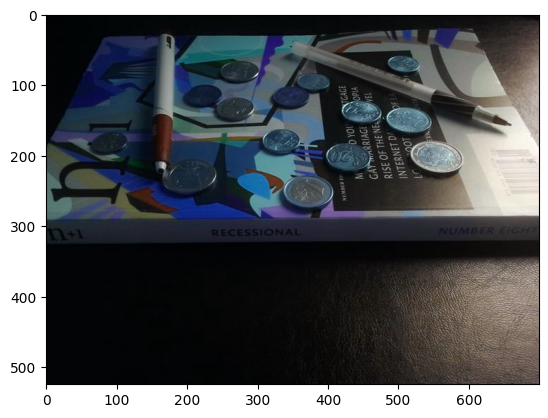

In [285]:
distorted_img = cv.imread('../data/proj2-foreshortened-image.jpg')
kernel   = Gaussian_Filter(0.3)
distorted_smooth_img = cv.filter2D(distorted_img, -1, kernel)
cv.imwrite("../results/Ques_6/distorted_smooth_img.png", distorted_smooth_img)
plt.figure(); plt.imshow(distorted_smooth_img.astype(np.uint8));

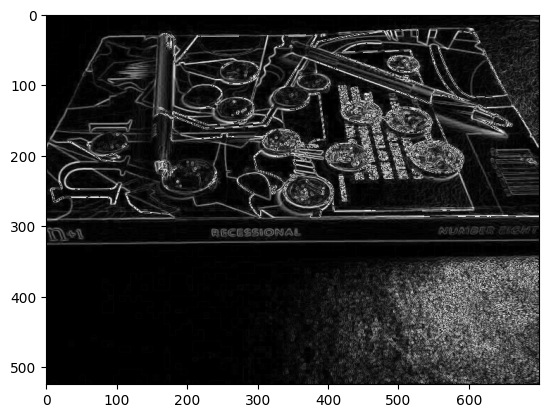

In [286]:
distorted_smooth_img_gray = rgb2gray(distorted_smooth_img)
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array(np.fliplr(sobel_x).transpose())
distorted_smooth_img_gray_x = cv.filter2D(distorted_smooth_img_gray, -1, sobel_x)
distorted_smooth_img_gray_y = cv.filter2D(distorted_smooth_img_gray, -1, sobel_y)
distorted_smooth_img_gray_edge = np.sqrt(distorted_smooth_img_gray_x**2 + distorted_smooth_img_gray_y**2)
cv.imwrite('../results/Ques_6/distorted_smooth_img_gray_edge.png', distorted_smooth_img_gray_edge)
plt.figure(); plt.imshow(distorted_smooth_img_gray_edge.astype(np.uint8), cmap='gray');

In [295]:
threshold=100
theta_res=1
rho_res=1
distorted_smooth_img_accumulator, distorted_smooth_img_thetas, distorted_smooth_img_rhos, distorted_smooth_img_binary_img = hough_transform(distorted_smooth_img_gray_edge, threshold, theta_res, rho_res)


In [302]:
acc_threshold=6
plot_lines('../results/Ques_6/distorted_smooth_img.png', distorted_smooth_img_accumulator, distorted_smooth_img_thetas, distorted_smooth_img_rhos, acc_threshold, save_path='../results/Ques_6/Smooth_Distorted_Image_Output_Lines.png')


In [292]:
threshold=160 
angle_res=10
min_radius=10
max_radius=50
radius_res=1
distorted_smooth_circle_accumulator, distorted_smooth_circle_radius_vector, distorted_smooth_circle_center_x_vector, distorted_smooth_circle_center_y_vector, distorted_smooth_circle_img_bin = circle_hough_transform(distorted_smooth_img_gray_edge, threshold, min_radius, max_radius, radius_res, angle_res)

cv.imwrite('../results/Ques_6/Smooth_Distorted_Binary_Image_Circle_Detection.png', distorted_smooth_circle_img_bin)


Circle Candidates:  400
Number of detected circles: 25395
len(center_x_vector):  1417


True

In [304]:
acc_threshold=20
plot_circles('../results/Ques_6/distorted_smooth_img.png', distorted_smooth_circle_accumulator, distorted_smooth_circle_radius_vector, distorted_smooth_circle_center_x_vector, distorted_smooth_circle_center_y_vector, acc_threshold, distorted_smooth_circle_img_bin, '../results/Ques_6/Smooth_Distorted_Image_Output_Circles.png')


### 6.2 
There are 5 detected lines. Some of these were expected while some were not. Some are missing as well. I should play with the parameters but it takes quite a bit of time and this is getting long. It's missing a few lines for the book and the pens while it's detecting some lines across the book. The point of view of the camera changed and thus a hyperparameter search should be performed. Most circles are not dected because they're not circle anymore from this point of view but more ellipses. 

### 6.3
For the circles, we might need to change the algo such that it checks for ellipses instead of circles. For the lines, we should perform a hyperparameter search to find the best parameters for the Hough Transform taking into account the new point of view of the camera and thus the depth of the objects.
